In [2]:
#gru using next word prediction in tensorflow with custom data

In [3]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout,Activation,GRU
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
text="""
Deep Learning tutorial covers the basics and more advanced topics, 
making it perfect for beginners and those with experience. 
Whether you just starting or looking to expand your knowledge,
this guide makes it easy to learn about the different technologies of Deep Learning.
Deep Learning is a branch of Artificial Intelligence that enables machines to learn from large amounts of data.
It uses neural networks with many layers to automatically find patterns and make predictions.
It is very useful for tasks like image recognition, language translation, and speech processing.
Deep learning models learn directly from data, without the need for manual feature extraction.
Popular applications of Deep Learning include self-driving cars, chatbots, medical image analysis, and recommendation systems.
"""

In [5]:
tokenizer=Tokenizer()

In [6]:
tokenizer.fit_on_texts([text])

In [7]:
tokenizer.word_index.items()

dict_items([('deep', 1), ('learning', 2), ('and', 3), ('it', 4), ('to', 5), ('of', 6), ('the', 7), ('for', 8), ('learn', 9), ('with', 10), ('is', 11), ('from', 12), ('data', 13), ('image', 14), ('tutorial', 15), ('covers', 16), ('basics', 17), ('more', 18), ('advanced', 19), ('topics', 20), ('making', 21), ('perfect', 22), ('beginners', 23), ('those', 24), ('experience', 25), ('whether', 26), ('you', 27), ('just', 28), ('starting', 29), ('or', 30), ('looking', 31), ('expand', 32), ('your', 33), ('knowledge', 34), ('this', 35), ('guide', 36), ('makes', 37), ('easy', 38), ('about', 39), ('different', 40), ('technologies', 41), ('a', 42), ('branch', 43), ('artificial', 44), ('intelligence', 45), ('that', 46), ('enables', 47), ('machines', 48), ('large', 49), ('amounts', 50), ('uses', 51), ('neural', 52), ('networks', 53), ('many', 54), ('layers', 55), ('automatically', 56), ('find', 57), ('patterns', 58), ('make', 59), ('predictions', 60), ('very', 61), ('useful', 62), ('tasks', 63), ('li

In [8]:
value={key:value for key,value in tokenizer.word_index.items()}

In [44]:
value

{'deep': 1,
 'learning': 2,
 'and': 3,
 'it': 4,
 'to': 5,
 'of': 6,
 'the': 7,
 'for': 8,
 'learn': 9,
 'with': 10,
 'is': 11,
 'from': 12,
 'data': 13,
 'image': 14,
 'tutorial': 15,
 'covers': 16,
 'basics': 17,
 'more': 18,
 'advanced': 19,
 'topics': 20,
 'making': 21,
 'perfect': 22,
 'beginners': 23,
 'those': 24,
 'experience': 25,
 'whether': 26,
 'you': 27,
 'just': 28,
 'starting': 29,
 'or': 30,
 'looking': 31,
 'expand': 32,
 'your': 33,
 'knowledge': 34,
 'this': 35,
 'guide': 36,
 'makes': 37,
 'easy': 38,
 'about': 39,
 'different': 40,
 'technologies': 41,
 'a': 42,
 'branch': 43,
 'artificial': 44,
 'intelligence': 45,
 'that': 46,
 'enables': 47,
 'machines': 48,
 'large': 49,
 'amounts': 50,
 'uses': 51,
 'neural': 52,
 'networks': 53,
 'many': 54,
 'layers': 55,
 'automatically': 56,
 'find': 57,
 'patterns': 58,
 'make': 59,
 'predictions': 60,
 'very': 61,
 'useful': 62,
 'tasks': 63,
 'like': 64,
 'recognition': 65,
 'language': 66,
 'translation': 67,
 'speech'

In [ ]:
value

In [9]:
total_words=len(tokenizer.word_index)+1

In [10]:
total_words

88

In [11]:
text_vector=[]
for line in text.split('\n'):
    vector=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(vector)):
        vec=vector[:i+1]
        text_vector.append(vec)
        

In [12]:
text_vector

[[1, 2],
 [1, 2, 15],
 [1, 2, 15, 16],
 [1, 2, 15, 16, 7],
 [1, 2, 15, 16, 7, 17],
 [1, 2, 15, 16, 7, 17, 3],
 [1, 2, 15, 16, 7, 17, 3, 18],
 [1, 2, 15, 16, 7, 17, 3, 18, 19],
 [1, 2, 15, 16, 7, 17, 3, 18, 19, 20],
 [21, 4],
 [21, 4, 22],
 [21, 4, 22, 8],
 [21, 4, 22, 8, 23],
 [21, 4, 22, 8, 23, 3],
 [21, 4, 22, 8, 23, 3, 24],
 [21, 4, 22, 8, 23, 3, 24, 10],
 [21, 4, 22, 8, 23, 3, 24, 10, 25],
 [26, 27],
 [26, 27, 28],
 [26, 27, 28, 29],
 [26, 27, 28, 29, 30],
 [26, 27, 28, 29, 30, 31],
 [26, 27, 28, 29, 30, 31, 5],
 [26, 27, 28, 29, 30, 31, 5, 32],
 [26, 27, 28, 29, 30, 31, 5, 32, 33],
 [26, 27, 28, 29, 30, 31, 5, 32, 33, 34],
 [35, 36],
 [35, 36, 37],
 [35, 36, 37, 4],
 [35, 36, 37, 4, 38],
 [35, 36, 37, 4, 38, 5],
 [35, 36, 37, 4, 38, 5, 9],
 [35, 36, 37, 4, 38, 5, 9, 39],
 [35, 36, 37, 4, 38, 5, 9, 39, 7],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40, 41],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40, 41, 6],
 [35, 36, 37, 4, 38, 5, 9, 39, 7, 40, 41, 6, 1],
 

In [13]:
max_length=max([len(i) for i in text_vector])

In [14]:
max_length

18

In [15]:
pad=np.array(pad_sequences(text_vector,padding='pre',maxlen=max_length))

In [16]:
pad

array([[ 0,  0,  0, ...,  0,  1,  2],
       [ 0,  0,  0, ...,  1,  2, 15],
       [ 0,  0,  0, ...,  2, 15, 16],
       ...,
       [ 0,  0,  0, ..., 14, 85,  3],
       [ 0,  0,  0, ..., 85,  3, 86],
       [ 0,  0, 77, ...,  3, 86, 87]])

In [17]:
x=pad[:,:-1]

In [18]:
x

array([[ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  1,  2],
       [ 0,  0,  0, ...,  1,  2, 15],
       ...,
       [ 0,  0,  0, ..., 84, 14, 85],
       [ 0,  0,  0, ..., 14, 85,  3],
       [ 0,  0, 77, ..., 85,  3, 86]])

In [19]:
y=pad[:,-1]

In [20]:
y

array([ 2, 15, 16,  7, 17,  3, 18, 19, 20,  4, 22,  8, 23,  3, 24, 10, 25,
       27, 28, 29, 30, 31,  5, 32, 33, 34, 36, 37,  4, 38,  5,  9, 39,  7,
       40, 41,  6,  1,  2,  2, 11, 42, 43,  6, 44, 45, 46, 47, 48,  5,  9,
       12, 49, 50,  6, 13, 51, 52, 53, 10, 54, 55,  5, 56, 57, 58,  3, 59,
       60, 11, 61, 62,  8, 63, 64, 14, 65, 66, 67,  3, 68, 69,  2, 70,  9,
       71, 12, 13, 72,  7, 73,  8, 74, 75, 76, 78,  6,  1,  2, 79, 80, 81,
       82, 83, 84, 14, 85,  3, 86, 87])

In [21]:
y=np.array(to_categorical(y,num_classes=total_words))

In [22]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
y.shape[1]

88

In [24]:
model=Sequential()
model.add(Embedding(total_words,50,input_length=max_length-1))
model.add(GRU(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1],activation='softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((88, 17), (22, 17), (88, 88), (22, 88))

In [29]:
x_train

array([[ 0,  0,  0, ...,  1,  2, 15],
       [ 0,  0,  0, ..., 14, 85,  3],
       [ 0,  0,  0, ...,  7, 17,  3],
       ...,
       [ 0,  0,  0, ..., 66, 67,  3],
       [ 0,  0,  0, ..., 54, 55,  5],
       [ 0,  0,  0, ...,  5, 32, 33]])

In [30]:
x_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        21],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 77, 78,
         6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26, 27, 28, 29, 30,
        31],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 70,
         9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 51, 52, 53, 10,
        54],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35, 36,
        37],
       [ 0,  0,  0,  0,  0,  0,  1,  2, 11, 42, 43,  6, 44, 45, 46, 47,
        48],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 11, 42, 43,  6, 44, 45,
        46],
       [ 0,  0,  0,  0,  0, 77, 78,  6,  1,  2, 79, 80, 81, 82, 83, 84,
        14],
       [ 0,  0,  0,  0,  0,  0,  0,  4, 51, 52, 53, 10, 54, 55,  5, 56,
        57],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2, 70,  9, 71, 12, 13,
        72],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [31]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early=EarlyStopping(monitor='val_accuracy',patience=130,restore_best_weights=True)

In [35]:
history=model.fit(x_train,y_train,validation_split=(0.2),epochs=150,verbose=True)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.0110 - loss: 4.4783 - val_accuracy: 0.0000e+00 - val_loss: 4.4796
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0858 - loss: 4.4705 - val_accuracy: 0.0556 - val_loss: 4.4816
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1001 - loss: 4.4657 - val_accuracy: 0.0556 - val_loss: 4.4827
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1190 - loss: 4.4604 - val_accuracy: 0.0556 - val_loss: 4.4837
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0891 - loss: 4.4518 - val_accuracy: 0.0556 - val_loss: 4.4849
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0741 - loss: 4.4444 - val_accuracy: 0.1111 - val_loss: 4.4868
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0513 - loss: 4.4396 - val_accuracy: 0.1111 - val_loss: 4.4888
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0748 - loss: 4.4260 - val_accuracy: 0.1111 - val_

In [36]:
import matplotlib.pyplot as plt

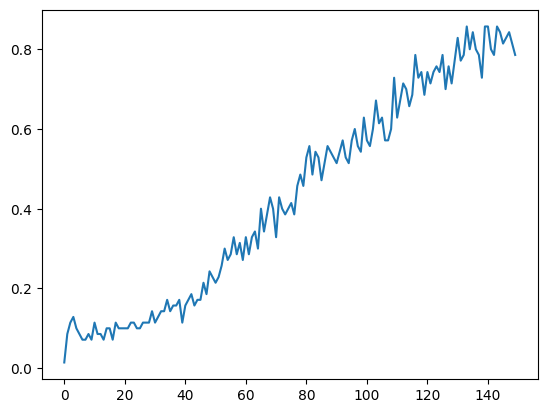

In [37]:
plt.plot(history.history['accuracy'])

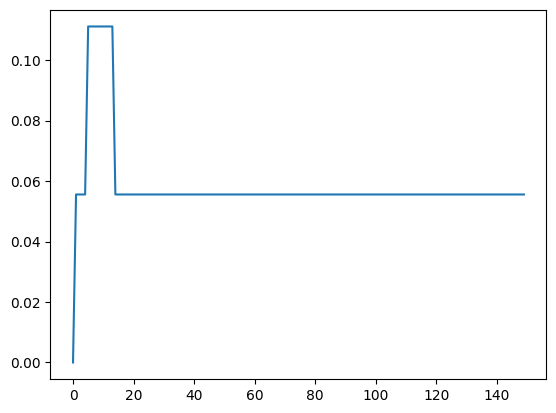

In [38]:
plt.plot(history.history['val_accuracy'])

In [39]:
def prediction(data):
    token=tokenizer.texts_to_sequences([data])[0]
    if len(token)>max_length:
        token=token[-(max_length):]
    else:
        pad_seq=np.array(pad_sequences([token],padding='pre',maxlen=max_length+1))
        print(pad_seq)
        pred=model.predict(pad_seq)
        value=np.argmax(pred,axis=1)
        for word,index in tokenizer.word_index.items():
            if index==value:
                return word
        return None

In [40]:
input="Deep learning models learn directly from  "
print(prediction(input))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  2 70  9 71 12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
data


In [43]:
#gru have 
#rt =>reset gate,
#zt =>update gate
#ht=>temporary hidden state
#it has no long term memory instead ht-1 will act as a both longterm and short term memory
#reset gate resetting the information from the ht-1 in memory
#temporary hidden state ht is coupling of update gate zt some information will be add in it
# ht-1 ---->ht
# update gate->candidate gate 